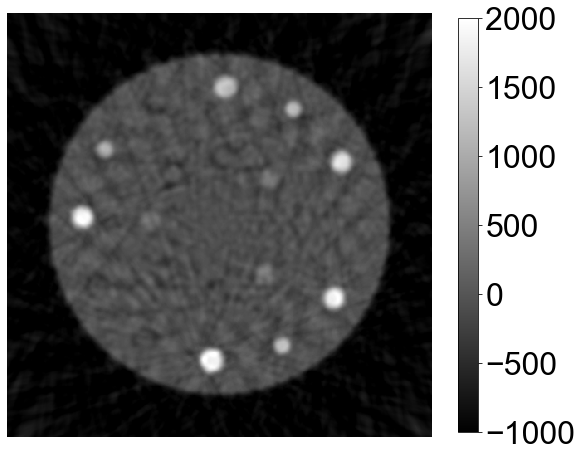

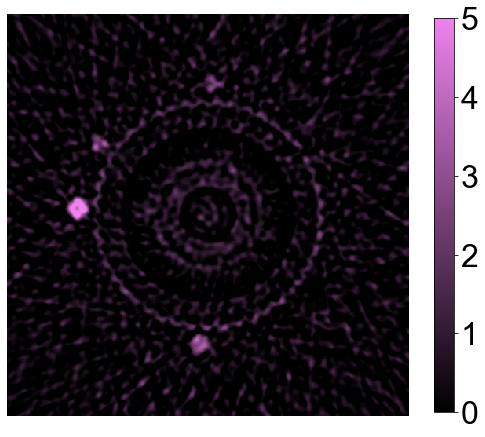

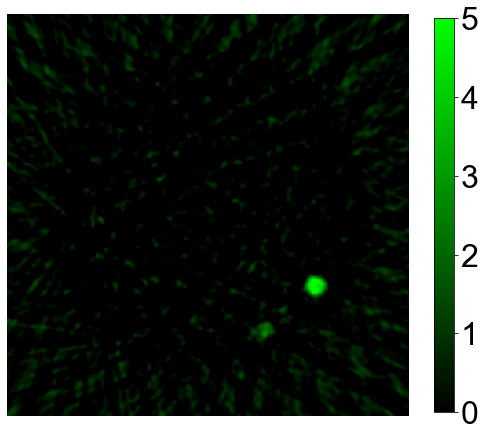

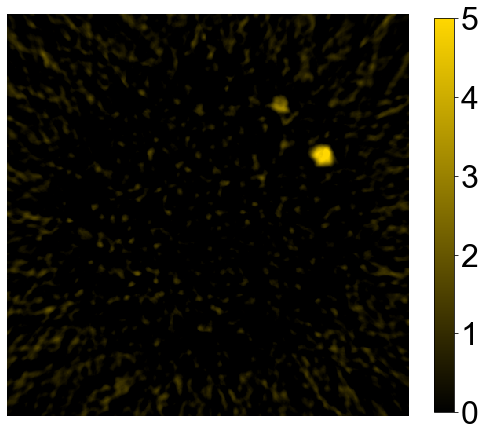

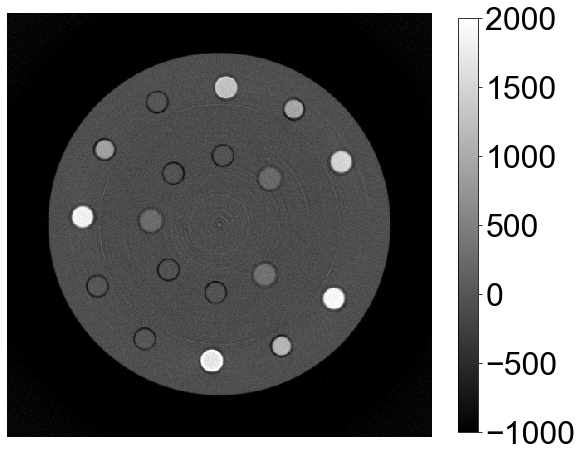

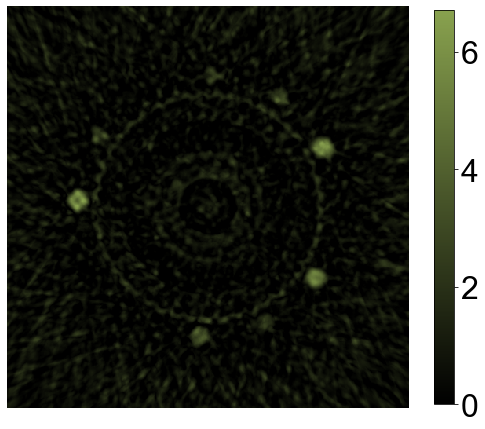

In [6]:
import numpy as np
import tigre
import tigre.algorithms as algs
import matplotlib.pyplot as plt
from numpy import genfromtxt
from matplotlib.pyplot import figure
from skimage.transform import iradon
import matplotlib
import astra
import scipy as sp
from matplotlib.colors import LinearSegmentedColormap
from tigre.utilities.geometry import Geometry

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 32}

matplotlib.rc('font', **font)

#Create colormaps--------------------------------------------------------------------------------------------
cmap = LinearSegmentedColormap.from_list(name='lime',colors=['black','lime'])
plt.register_cmap('lime', cmap)
cmap = LinearSegmentedColormap.from_list(name='violet',colors=['black','violet'])
plt.register_cmap('violet', cmap)
cmap = LinearSegmentedColormap.from_list(name='gold',colors=['black','gold'])
plt.register_cmap('gold', cmap)
cmap = LinearSegmentedColormap.from_list(name='brown',colors=['black','#88a14e'])
plt.register_cmap('brown', cmap)
cmap = LinearSegmentedColormap.from_list(name='all',colors=['black','lime','black','violet','black','gold','black','cyan'])
plt.register_cmap('all', cmap)

class PCDGeometry(Geometry):
    """
    This is the Geometry for the tigre reconstruction, you shouldn't need to change anything
    """
    def __init__(self, DSD=878, DSO=622, h_offset=0, v_offset=0):

        Geometry.__init__(self)

        # VARIABLE                                          DESCRIPTION                    UNITS
        # -------------------------------------------------------------------------------------
        self.DSD = DSD  # Distance Source Detector      (mm)
        self.DSO = DSO  # Distance Source Origin        (mm)
        # Detector parameters
        self.nDetector = np.array((4, 96))  # number of pixels              (px)
        self.dDetector = np.array((1.98, 1.98))  # size of each pixel            (mm)
        self.sDetector = self.nDetector * self.dDetector  # total size of the detector    (mm)
        # Image parameters
        self.nVoxel = np.array((4, 512, 512))  # number of voxels              (vx)
        self.sVoxel = np.array((5.61, 120, 120))  # total size of the image       (mm)
        self.dVoxel = self.sVoxel / self.nVoxel  # size of each voxel            (mm)
        # Offsets
        self.offOrigin = np.array((0, 0, 0))  # Offset of image from origin   (mm)
        self.offDetector = np.array((v_offset, h_offset))  # Offset of Detector            (mm)

        # Auxiliary
        self.accuracy = 0.5  # Accuracy of FWD proj          (vx/sample)  # noqa: E501
        # Mode
        self.mode = "cone"  # parallel, cone                ...
        self.filter = None

# Load the 45 angle sinogram here
# sino = np.load('45angle sinogram with 6 bins')
sino = np.load('Downloads/sinogram_45_angles.npy')
sino=np.roll(sino, 23, 0)

# Define the geometry and angles
geo = PCDGeometry(h_offset=0.33)
angles = np.linspace(0, 2 * np.pi, 45, endpoint=False)

# Reconstruct all bins of CT acquisition
ct = np.zeros((6, 4, 512, 512))
for b in range(6):
    ct[b] = algs.fdk(sino[:, :, :, b], geo, angles)

    
mu_water=0.02024902418255806
# Plot the CT image for all energies
fig_ct = plt.figure(figsize=(9.5,10.5))
ct[-1,2][ct[-1,2]<0] = 0
plt.imshow((ct[-1, 2].T/mu_water)*1000-1000,cmap='gray',vmax=2000)
plt.axis('off')
plt.colorbar(shrink=0.725)
plt.show()


# Reconstruct iodine image
ki = algs.fdk(sino[:, :, :, 1] - sino[:, :, :, 0], geo, angles)

# Plot the iodine image
fig_i = plt.figure(figsize=(9,10))
ki[2][ki[2]<0] = 0
plt.imshow(ki[2].T*5/0.005909021231345833,cmap='violet',vmax=5)
plt.axis('off')
plt.colorbar(shrink=0.725)
plt.show()

# Reconstruct gadolinium image
kgd = algs.fdk(sino[:, :, :, 2] - sino[:, :, :, 1], geo, angles)

# Plot the gadolinium image
fig_gd = plt.figure(figsize=(9,10))
kgd[2][kgd[2]<0] = 0
plt.imshow(kgd[2].T*5/0.006502716070972383,cmap='lime',vmax=5)
plt.colorbar(shrink=0.725)
plt.axis('off')
plt.show()

# Reconstruct gold image
kau = algs.fdk(sino[:, :, :, 4] - sino[:, :, :, 3], geo, angles)

# Plot the gold image
fig_au = plt.figure(figsize=(9,10))
kau[2][kau[2]<0] = 0
plt.imshow(kau[2].T*5/0.006850855019874871,cmap='gold',vmax=5)
plt.colorbar(shrink=0.725)
plt.axis('off')
plt.show()

I_image=ki[2].T*5/0.005909021231345833
Gd_image=kgd[2].T*5/0.006502716070972383
Au_image=kau[2].T*5/0.006850855019874871


full_res=np.load('Downloads/full_res.npy')
full_res=np.roll(full_res, 23, 0)
figure(5,figsize=(9.5,10.5))
plt.imshow(full_res[7],cmap='gray',vmin=-1000,vmax=2000)
plt.colorbar(shrink=0.725)
plt.axis('off')
plt.show()

figure(6,figsize=(9,10))
plt.imshow(kau[2].T*5/0.006850855019874871+kgd[2].T*5/0.006502716070972383+ki[2].T*5/0.005909021231345833,cmap='brown')
plt.axis('off')
plt.colorbar(shrink=0.725)

In [4]:
#Vial coordinates 512x512
coordsI5 =[[i+85,j+243] for i in np.arange(0,10) for j in np.arange(0,10)] 
coordsI3 =[[i+116,j+163] for i in np.arange(0,5) for j in np.arange(0,5)]
coordsI1=[[i+167,j+248] for i in np.arange(0,5) for j in np.arange(0,5)]
coordsGd5=[[i+388,j+341] for i in np.arange(0,10) for j in np.arange(0,10)] 
coordsGd3=[[i+327,j+400] for i in np.arange(0,5) for j in np.arange(0,5)]
coordsGd1=[[i+306,j+312] for i in np.arange(0,5) for j in np.arange(0,5)]
coordsAu5=[[i+397,j+175] for i in np.arange(0,10) for j in np.arange(0,10)] 
coordsAu3=[[i+342,j+114] for i in np.arange(0,5) for j in np.arange(0,5)]
coordsAu1=[[i+312,j+199] for i in np.arange(0,5) for j in np.arange(0,5)]
coordsMix33=[[i+240,j+416] for i in np.arange(0,10) for j in np.arange(0,10)]
coordsMix2=[[i+257,j+86] for i in np.arange(0,10) for j in np.arange(0,10)]
coords0=[[i+175,j+104] for i in np.arange(0,5) for j in np.arange(0,5)]
coords01=[[i+360,j+240] for i in np.arange(0,40) for j in np.arange(0,40)]
coords02=[[i+240,j+240] for i in np.arange(0,40) for j in np.arange(0,40)]
coords03=[[i+140,j+330] for i in np.arange(0,20) for j in np.arange(0,20)]

images=np.load('Downloads/CT_FDK_45.npy')
I_image=images[1][1]-images[0][1]
I_image[I_image<0]=0
I_image=I_image*5/0.006499868035316467

#Linearity + CNR calculations---------------------------------------------------------------------

5% I 1.0
3% I 0.4494615940678052
1% I 0.1909576382106175
3.3% I 0.6131540240967215
2% I 0.3702119476451514
0% I 0.024961957709370836
[0.96829263]
[0.93419177]


([<matplotlib.axis.YTick at 0x269ac1cfd88>,
 <a list of 7 Text yticklabel objects>)

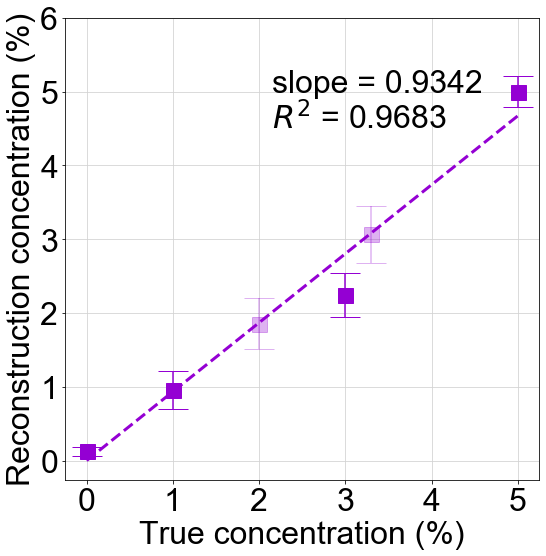

In [32]:
mask=np.zeros(shape=(512,512))
for x,y in coordsI5:
    mask[int(y)][int(x)]=1
vial1=mask*I_image
vial1[vial1==0]=np.nan
vial1_mean=np.nanmean(vial1)
vial1_std=np.nanstd(vial1)
print('5% I', vial1_mean/5)

mask=np.zeros(shape=(512,512))
for x,y in coordsI3:
    mask[int(y)][int(x)]=1
vial2=mask*I_image
vial2[vial2==0]=np.nan
vial2_mean=np.nanmean(vial2)
vial2_std=np.nanstd(vial2)
print('3% I', vial2_mean/5)

mask=np.zeros(shape=(512,512))
for x,y in coordsI1:
    mask[int(y)][int(x)]=1
vial3=mask*I_image
vial3[vial3==0]=np.nan
vial3_mean=np.nanmean(vial3)
vial3_std=np.nanstd(vial3)
print('1% I', vial3_mean/5)


mask=np.zeros(shape=(512,512))
for x,y in coordsMix33:
    mask[int(y)][int(x)]=1
vial4=mask*I_image
if (vial4==0).all()==False:
    vial4[vial4==0]=np.nan
    vial4_mean=np.nanmean(vial4)
    vial4_std=np.nanstd(vial4)
else:
    vial4_mean=0
    vial4_std=0
print('3.3% I', vial4_mean/5)

mask=np.zeros(shape=(512,512))
for x,y in coordsMix2:
    mask[int(y)][int(x)]=1
vial5=mask*I_image
if (vial5==0).all()==False:
    vial5[vial5==0]=np.nan
    vial5_mean=np.nanmean(vial5)
    vial5_std=np.nanstd(vial5)
else:
    vial5_mean=0
    vial5_std=0
print('2% I', vial5_mean/5)

mask=np.zeros(shape=(512,512))
for x,y in coords0:
    mask[int(y)][int(x)]=1
vial6=mask*I_image
if (vial6==0).all()==False:
    vial6[vial6==0]=np.nan
    vial6_mean=np.nanmean(vial6)
    vial6_std=np.nanstd(vial6)
else:
    vial6_mean=0
    vial6_std=0
print('0% I', vial6_mean/5)


vial_means1=np.array([vial6_mean,vial3_mean,vial2_mean,vial1_mean])
conc1=np.array([0,1,3,5])
error1=[vial6_std,vial3_std,vial2_std,vial1_std]
vial_means2=[vial5_mean,vial4_mean]
conc2=np.array([2,3.3])
error2=[vial5_std,vial4_std]
conc1=np.array([0,1,3,5])
vial_means_lin=[vial6_mean,vial3_mean,vial2_mean,vial1_mean]

m = np.linalg.lstsq(conc1[:,np.newaxis], vial_means1,rcond=-1)[0]
resid = np.linalg.lstsq(conc1[:,np.newaxis], vial_means1,rcond=-1)[1]
r2 = 1 - resid / (vial_means1.size * vial_means1.var())
print(r2)
print(m)
figure(9,figsize=(8.5,8.5))
plt.errorbar(conc1,vial_means1,marker='s',yerr=error1,capsize=15,markersize=15,linestyle='',c='darkviolet')
plt.errorbar(conc2,vial_means2,marker='s',yerr=error2,capsize=15,markersize=15,linestyle='',c='darkviolet',alpha=0.3)
plt.plot(conc1,conc1*m,c='darkviolet',linestyle='--',lw=3)
plt.xlabel('True concentration (%)')
plt.ylabel('Reconstruction concentration (%)')
plt.annotate("$R^2$ = {:.4f}".format(r2[0]), (2.15, 4.5))
plt.annotate("slope = {:.4f}".format(m[0]), (2.15, 5))
plt.grid(c='lightgray')
plt.xticks([0,1,2,3,4,5])
plt.yticks([0,1,2,3,4,5,6])

0.2686383918559965 0.28631684102485616 0.3180117117942159
0.2909889815583562
0.011792679964038183
0.2909889815583562
0.4444032286694158
0.6547859304029001


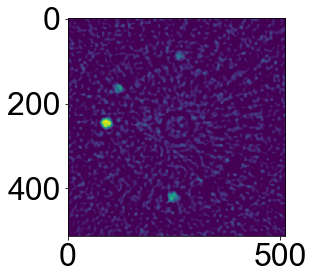

In [6]:
#Noise
plt.imshow(I_image)

mask=np.zeros(shape=(512,512))
for x,y in coords01:
    mask[int(y)][int(x)]=1
vial7=mask*I_image
if (vial7==0).all()==False:
    vial7[vial7==0]=np.nan
    vial7_mean=np.nanmean(vial7)
    vial7_std=np.nanstd(vial7)
else:
    vial7_mean=0
    vial7_std=0

mask=np.zeros(shape=(512,512))
for x,y in coords02:
    mask[int(y)][int(x)]=1
vial8=mask*I_image
if (vial8==0).all()==False:
    vial8[vial8==0]=np.nan
    vial8_mean=np.nanmean(vial8)
    vial8_std=np.nanstd(vial8)
else:
    vial8_mean=0
    vial8_std=0
    
mask=np.zeros(shape=(512,512))
for x,y in coords03:
    mask[int(y)][int(x)]=1
vial9=mask*I_image
if (vial9==0).all()==False:
    vial9[vial9==0]=np.nan
    vial9_mean=np.nanmean(vial9)
    vial9_std=np.nanstd(vial9)
else:
    vial9_mean=0
    vial9_std=0
    
print(vial7_std,vial8_std,vial9_std)
print((np.mean([vial7_std,vial8_std,vial9_std])))
print(np.std([vial7_std,vial8_std,vial9_std])/np.sqrt(3))
print((vial7_std+vial8_std+vial9_std)/3)
print((vial7_mean+vial8_mean+vial9_mean)/3)
print(((vial7_std+vial8_std+vial9_std)/3)/((vial7_mean+vial8_mean+vial9_mean)/3))

(6, 4, 512, 512)


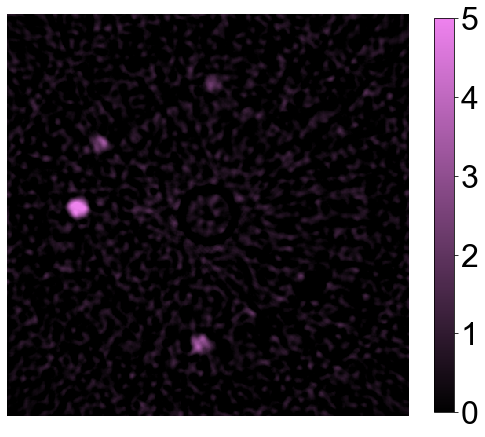

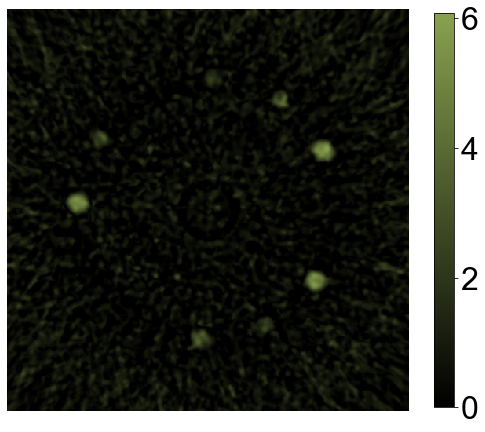

In [17]:
images=np.load('Downloads/CT_FDK_45.npy')
I_image=images[1][1]-images[0][1]
I_image[I_image<0]=0
print(np.shape(images))
figure(5,figsize=(9,10))
I_image=I_image*5/0.006499868035316467
plt.imshow(I_image,cmap='violet',vmax=5)

plt.colorbar(shrink=0.725)
plt.axis('off')
plt.show()

figure(6,figsize=(9,10))
plt.imshow(kau[2].T*5/0.006850855019874871+kgd[2].T*5/0.006502716070972383+I_image,cmap='brown')
plt.axis('off')
plt.colorbar(shrink=0.725)